# U.S. National Park Service Analysis of Gigi Jones
## Project 1 partner: Pratixa Shah 
This notebook shows Gigi's share of the analysis used for the project 1. Another notebook, which has the other half of the analysis, represents Pratixa's work. We found that it was not necessary to combine our notebooks into one since we each completed separate, independent analyses. However, we were in constant communication by  discussing our progress, coding, analytical approach, and the story direction to ensure we completed this project on time. Given that we had less than a week and half to complete this project, we believe we met our goal of applying the coding/analytical lessons we have learned so far in order to tell an interesting, compelling story with the available data on the U.S. National Parks.


In [1]:
# Getting dependencies.
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Set global Jupyter Notebook preferences and formatting
plt.ioff()
pd.options.display.float_format = '{:20,.0f}'.format

# Read files into Jupyter Notebook
file_path="Data_Resources/park_type_and_region.csv"
parkcode_df = pd.read_csv(file_path)
#parkcode_df.head()

file_path="Data_Resources/monthly_park_visits.csv"
monthly_visits_df = pd.read_csv(file_path)
monthly_visits_df.isnull().sum()

parkCode      0
Park Name     0
JAN_2019     10
FEB_2019      6
MAR_2019      5
APR_2019      5
MAY_2019      2
JUN_2019      0
JUL_2019      0
AUG_2019      0
SEP_2019      0
OCT_2019      0
NOV_2019      0
DEC_2019      0
JAN_2020     10
FEB_2020      6
MAR_2020      5
APR_2020      5
MAY_2020      2
JUN_2020      0
JUL_2020      0
AUG_2020      0
SEP_2020      0
OCT_2020      0
NOV_2020      0
DEC_2020      0
dtype: int64

In [2]:
# Start cleaning data.
monthly_visits_df = monthly_visits_df.fillna(0)
monthly_visits_df.isnull().sum()

parkCode     0
Park Name    0
JAN_2019     0
FEB_2019     0
MAR_2019     0
APR_2019     0
MAY_2019     0
JUN_2019     0
JUL_2019     0
AUG_2019     0
SEP_2019     0
OCT_2019     0
NOV_2019     0
DEC_2019     0
JAN_2020     0
FEB_2020     0
MAR_2020     0
APR_2020     0
MAY_2020     0
JUN_2020     0
JUL_2020     0
AUG_2020     0
SEP_2020     0
OCT_2020     0
NOV_2020     0
DEC_2020     0
dtype: int64

In [3]:
# Take a look at the dataframe.
monthly_visits_df.columns

Index(['parkCode', 'Park Name', 'JAN_2019', 'FEB_2019', 'MAR_2019', 'APR_2019',
       'MAY_2019', 'JUN_2019', 'JUL_2019', 'AUG_2019', 'SEP_2019', 'OCT_2019',
       'NOV_2019', 'DEC_2019', 'JAN_2020', 'FEB_2020', 'MAR_2020', 'APR_2020',
       'MAY_2020', 'JUN_2020', 'JUL_2020', 'AUG_2020', 'SEP_2020', 'OCT_2020',
       'NOV_2020', 'DEC_2020'],
      dtype='object')

In [4]:
# Merging data files of visits by month and park characteristics.
month_df = pd.merge(monthly_visits_df, parkcode_df, on="parkCode", how="outer")
month_df

,parkCode,Park Name,JAN_2019,FEB_2019,MAR_2019,APR_2019,MAY_2019,JUN_2019,JUL_2019,AUG_2019,...,MAY_2020,JUN_2020,JUL_2020,AUG_2020,SEP_2020,OCT_2020,NOV_2020,DEC_2020,parkType,Region
0,ABLI,Abraham Lincoln Birthplace NHP,"1,939","6,534","14,566","16,496","24,646","26,854","37,334","34,816",...,"21,102","29,111","37,249","31,290","29,134","18,615","12,147","7,472",National Historical Park,Southeast
1,ACAD,Acadia NP,"8,532","9,154","20,161","68,046","226,156","490,720","756,439","759,735",...,"103,120","201,156","493,971","681,746","500,320","480,859","76,251","21,260",National Park,Northeast
2,ADAM,Adams NHP,27,179,253,537,"13,187","23,963","75,333","26,011",...,743,759,460,520,575,500,491,544,National Historical Park,Northeast
3,AFBG,African Burial Ground NM,96,"1,571","1,395","5,022","5,482","4,621","5,520","4,332",...,0,0,0,0,0,446,446,116,National Monument,Northeast
4,AGFO,Agate Fossil Beds NM,0,94,401,391,"2,188","3,276","4,222","2,775",...,310,834,"2,377","1,686","1,558",978,252,121,National Monument,Midwest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,YELL,Yellowstone NP,"33,896","31,650","28,695","48,150","434,385","781,853","936,062","820,006",...,"46,219","573,205","955,645","881,829","837,114","359,889","24,132","28,643",National Park,Intermountain
375,YOSE,Yosemite NP,"116,746","111,665","173,610","297,207","393,004","496,625","717,462","703,153",...,0,"236,534","501,068","375,226","258,561","249,827","136,799","117,454",National Park,Pacific West
376,YUCH,Yukon-Charley Rivers NPRES,6,72,46,37,14,182,354,246,...,25,72,149,164,88,89,8,20,National Preserve,Alaska
377,ZION,Zion NP,"98,828","102,269","296,316","372,349","529,553","594,896","629,802","535,322",...,"178,194","377,425","449,518","450,183","520,987","559,342","319,853","227,244",National Park,Intermountain


In [5]:
# Removed that last park in the list with NaN.
month_df = month_df.iloc[:-1]
month_df

,parkCode,Park Name,JAN_2019,FEB_2019,MAR_2019,APR_2019,MAY_2019,JUN_2019,JUL_2019,AUG_2019,...,MAY_2020,JUN_2020,JUL_2020,AUG_2020,SEP_2020,OCT_2020,NOV_2020,DEC_2020,parkType,Region
0,ABLI,Abraham Lincoln Birthplace NHP,"1,939","6,534","14,566","16,496","24,646","26,854","37,334","34,816",...,"21,102","29,111","37,249","31,290","29,134","18,615","12,147","7,472",National Historical Park,Southeast
1,ACAD,Acadia NP,"8,532","9,154","20,161","68,046","226,156","490,720","756,439","759,735",...,"103,120","201,156","493,971","681,746","500,320","480,859","76,251","21,260",National Park,Northeast
2,ADAM,Adams NHP,27,179,253,537,"13,187","23,963","75,333","26,011",...,743,759,460,520,575,500,491,544,National Historical Park,Northeast
3,AFBG,African Burial Ground NM,96,"1,571","1,395","5,022","5,482","4,621","5,520","4,332",...,0,0,0,0,0,446,446,116,National Monument,Northeast
4,AGFO,Agate Fossil Beds NM,0,94,401,391,"2,188","3,276","4,222","2,775",...,310,834,"2,377","1,686","1,558",978,252,121,National Monument,Midwest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,WUPA,Wupatki NM,724,"4,243","17,447","14,767","14,117","27,113","26,993","24,528",...,0,"17,432","19,276","22,804","24,198","17,215","12,067","8,339",National Monument,Intermountain
374,YELL,Yellowstone NP,"33,896","31,650","28,695","48,150","434,385","781,853","936,062","820,006",...,"46,219","573,205","955,645","881,829","837,114","359,889","24,132","28,643",National Park,Intermountain
375,YOSE,Yosemite NP,"116,746","111,665","173,610","297,207","393,004","496,625","717,462","703,153",...,0,"236,534","501,068","375,226","258,561","249,827","136,799","117,454",National Park,Pacific West
376,YUCH,Yukon-Charley Rivers NPRES,6,72,46,37,14,182,354,246,...,25,72,149,164,88,89,8,20,National Preserve,Alaska


In [6]:
# Make new column that sums the months of 2019 for each park.
month_df['total_2019']=month_df.iloc[:, 2:14].sum(axis=1)
month_df

<ipython-input-6-148bdb3d8120>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_df['total_2019']=month_df.iloc[:, 2:14].sum(axis=1)


,parkCode,Park Name,JAN_2019,FEB_2019,MAR_2019,APR_2019,MAY_2019,JUN_2019,JUL_2019,AUG_2019,...,JUN_2020,JUL_2020,AUG_2020,SEP_2020,OCT_2020,NOV_2020,DEC_2020,parkType,Region,total_2019
0,ABLI,Abraham Lincoln Birthplace NHP,"1,939","6,534","14,566","16,496","24,646","26,854","37,334","34,816",...,"29,111","37,249","31,290","29,134","18,615","12,147","7,472",National Historical Park,Southeast,"238,226"
1,ACAD,Acadia NP,"8,532","9,154","20,161","68,046","226,156","490,720","756,439","759,735",...,"201,156","493,971","681,746","500,320","480,859","76,251","21,260",National Park,Northeast,"3,437,286"
2,ADAM,Adams NHP,27,179,253,537,"13,187","23,963","75,333","26,011",...,759,460,520,575,500,491,544,National Historical Park,Northeast,"187,400"
3,AFBG,African Burial Ground NM,96,"1,571","1,395","5,022","5,482","4,621","5,520","4,332",...,0,0,0,0,446,446,116,National Monument,Northeast,"47,427"
4,AGFO,Agate Fossil Beds NM,0,94,401,391,"2,188","3,276","4,222","2,775",...,834,"2,377","1,686","1,558",978,252,121,National Monument,Midwest,"16,657"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,WUPA,Wupatki NM,724,"4,243","17,447","14,767","14,117","27,113","26,993","24,528",...,"17,432","19,276","22,804","24,198","17,215","12,067","8,339",National Monument,Intermountain,"187,059"
374,YELL,Yellowstone NP,"33,896","31,650","28,695","48,150","434,385","781,853","936,062","820,006",...,"573,205","955,645","881,829","837,114","359,889","24,132","28,643",National Park,Intermountain,"4,020,288"
375,YOSE,Yosemite NP,"116,746","111,665","173,610","297,207","393,004","496,625","717,462","703,153",...,"236,534","501,068","375,226","258,561","249,827","136,799","117,454",National Park,Pacific West,"4,422,861"
376,YUCH,Yukon-Charley Rivers NPRES,6,72,46,37,14,182,354,246,...,72,149,164,88,89,8,20,National Preserve,Alaska,"1,114"


In [7]:
# Make new column that sums the months of 2020 for each park.
month_df['total_2020']=month_df.iloc[:, 14:27].sum(axis=1)
month_df

<ipython-input-7-6e5f52f8e490>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_df['total_2020']=month_df.iloc[:, 14:27].sum(axis=1)


,parkCode,Park Name,JAN_2019,FEB_2019,MAR_2019,APR_2019,MAY_2019,JUN_2019,JUL_2019,AUG_2019,...,JUL_2020,AUG_2020,SEP_2020,OCT_2020,NOV_2020,DEC_2020,parkType,Region,total_2019,total_2020
0,ABLI,Abraham Lincoln Birthplace NHP,"1,939","6,534","14,566","16,496","24,646","26,854","37,334","34,816",...,"37,249","31,290","29,134","18,615","12,147","7,472",National Historical Park,Southeast,"238,226","228,141"
1,ACAD,Acadia NP,"8,532","9,154","20,161","68,046","226,156","490,720","756,439","759,735",...,"493,971","681,746","500,320","480,859","76,251","21,260",National Park,Northeast,"3,437,286","2,669,034"
2,ADAM,Adams NHP,27,179,253,537,"13,187","23,963","75,333","26,011",...,460,520,575,500,491,544,National Historical Park,Northeast,"187,400","6,937"
3,AFBG,African Burial Ground NM,96,"1,571","1,395","5,022","5,482","4,621","5,520","4,332",...,0,0,0,446,446,116,National Monument,Northeast,"47,427","7,908"
4,AGFO,Agate Fossil Beds NM,0,94,401,391,"2,188","3,276","4,222","2,775",...,"2,377","1,686","1,558",978,252,121,National Monument,Midwest,"16,657","8,722"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,WUPA,Wupatki NM,724,"4,243","17,447","14,767","14,117","27,113","26,993","24,528",...,"19,276","22,804","24,198","17,215","12,067","8,339",National Monument,Intermountain,"187,059","146,074"
374,YELL,Yellowstone NP,"33,896","31,650","28,695","48,150","434,385","781,853","936,062","820,006",...,"955,645","881,829","837,114","359,889","24,132","28,643",National Park,Intermountain,"4,020,288","3,806,306"
375,YOSE,Yosemite NP,"116,746","111,665","173,610","297,207","393,004","496,625","717,462","703,153",...,"501,068","375,226","258,561","249,827","136,799","117,454",National Park,Pacific West,"4,422,861","2,268,313"
376,YUCH,Yukon-Charley Rivers NPRES,6,72,46,37,14,182,354,246,...,149,164,88,89,8,20,National Preserve,Alaska,"1,114",666


In [8]:
# ANALYSIS 1: Sum the Total Visits for 2019 v. 2020

total_visit2019 = month_df['total_2019'].sum()
total_visit2019


327516619.0

In [9]:
total_visit2020 = month_df['total_2020'].sum()
total_visit2020

235972454.0

In [10]:
# ANALYSIS 2: Impact of COVID-19 on Summer Visits
# Extract data for 2019 summer months: June, July, and August.
jun2019 = month_df.groupby('parkType')['JUN_2019'].sum()
jul2019 = month_df.groupby('parkType')['JUL_2019'].sum()
aug2019 = month_df.groupby('parkType')['AUG_2019'].sum()

summer2019 = jun2019 + jul2019 + aug2019
summer2019.sort_values()

parkType
International Historic Site                   6,972
National Reserve                             54,177
National Wild & Scenic River                732,025
National Battlefield                        784,855
National Preserve                         1,015,178
National Battlefield Park                 1,152,967
National Military Park                    1,332,896
National River                            1,688,629
National Lakeshore                        1,802,531
National Historic Site                    3,093,903
Park (Other)                              3,201,810
National Seashore                         7,960,714
National Monument                        10,030,522
National Parkway                         10,402,600
National Memorial                        12,552,395
National Historical Park                 13,095,280
National Recreation Area                 18,612,413
National Park                            40,226,378
dtype: float64

In [11]:
# Extract data for 2020 summer months: June, July, and August.
jun2020 = month_df.groupby('parkType')['JUN_2020'].sum()
jul2020 = month_df.groupby('parkType')['JUL_2020'].sum()
aug2020 = month_df.groupby('parkType')['AUG_2020'].sum()


summer2020 = jun2020 + jul2020 + aug2020
summer2020.sort_values()

parkType
International Historic Site                   3,923
National Reserve                             48,187
National Battlefield                        603,402
National Wild & Scenic River                869,903
National Military Park                      925,031
National Preserve                         1,025,094
National Historic Site                    1,080,205
National Battlefield Park                 1,081,845
Park (Other)                              1,566,027
National River                            1,943,731
National Lakeshore                        2,148,018
National Monument                         2,908,608
National Memorial                         4,441,835
National Historical Park                  5,739,228
National Seashore                         7,961,010
National Parkway                          9,823,600
National Recreation Area                 17,871,213
National Park                            29,664,949
dtype: float64

<IPython.core.display.Javascript object>


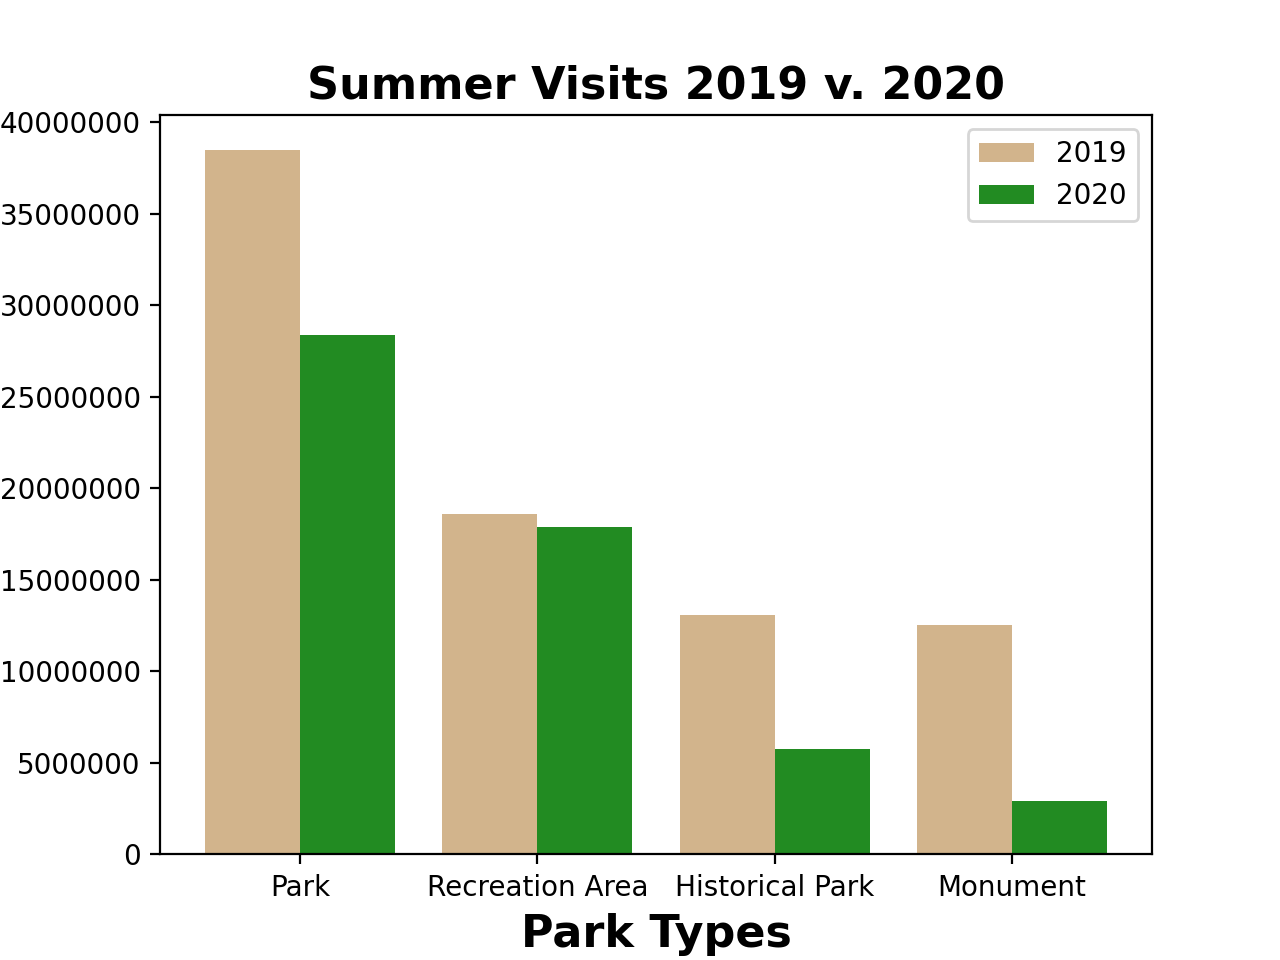

In [12]:
# Create a multi-bar chart, originally thought to add the Total 
# as another bar but the other bars looked too small in comparison. 

w = 0.4

x = ["Park", "Recreation Area", "Historical Park", "Monument"]
data2019 = [38466358, 18612413, 13095280, 12552395]
data2020 = [28387823, 17871213, 5739228, 2908608]

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

plt.bar(bar1, data2019,w,label="2019", color="tan")
plt.bar(bar2, data2020,w,label="2020", color="forestgreen")

plt.xlabel("Park Types",fontsize=16, color='black',fontweight='bold')
plt.ylabel("Number of Visits",fontsize=16, color='black',fontweight='bold')
plt.title("Summer Visits 2019 v. 2020",fontsize=16, color='black',fontweight='bold')
plt.xticks(bar1+w/2, x)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


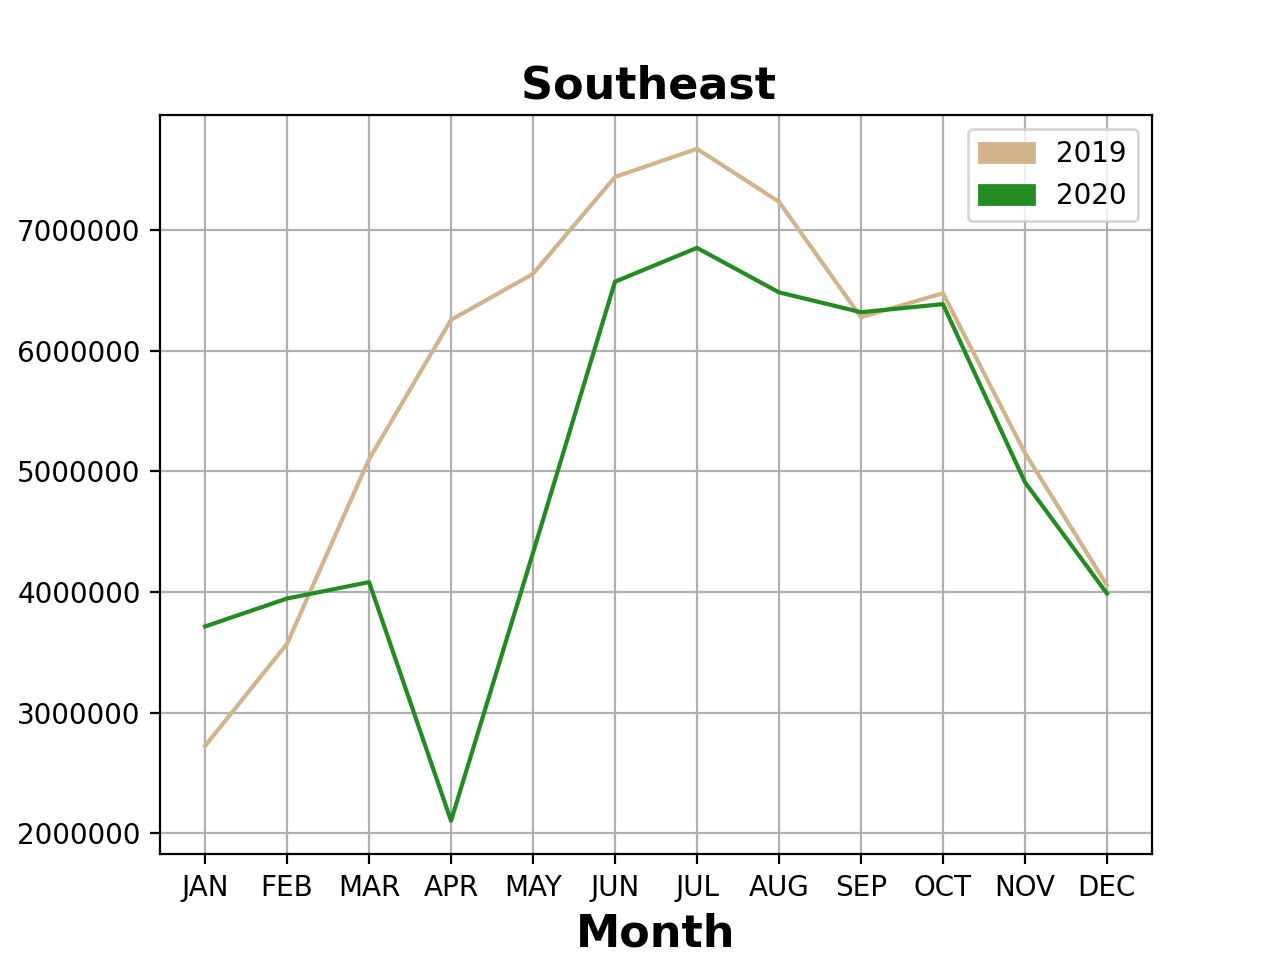

<IPython.core.display.Javascript object>


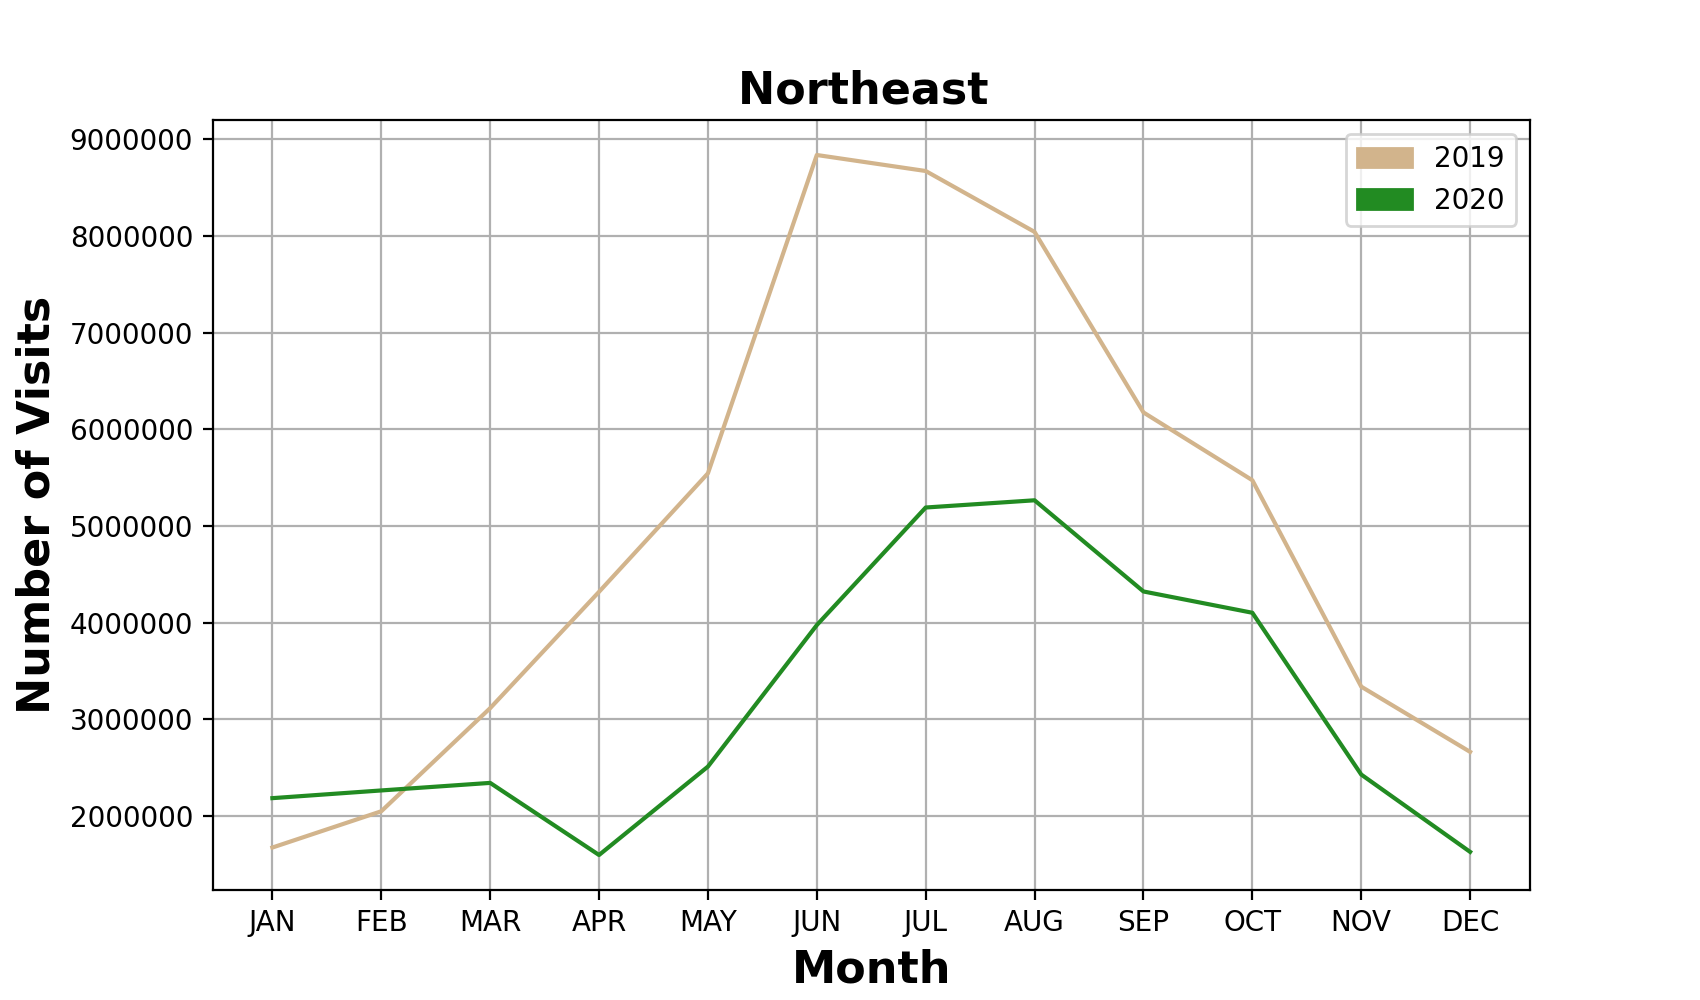

<IPython.core.display.Javascript object>


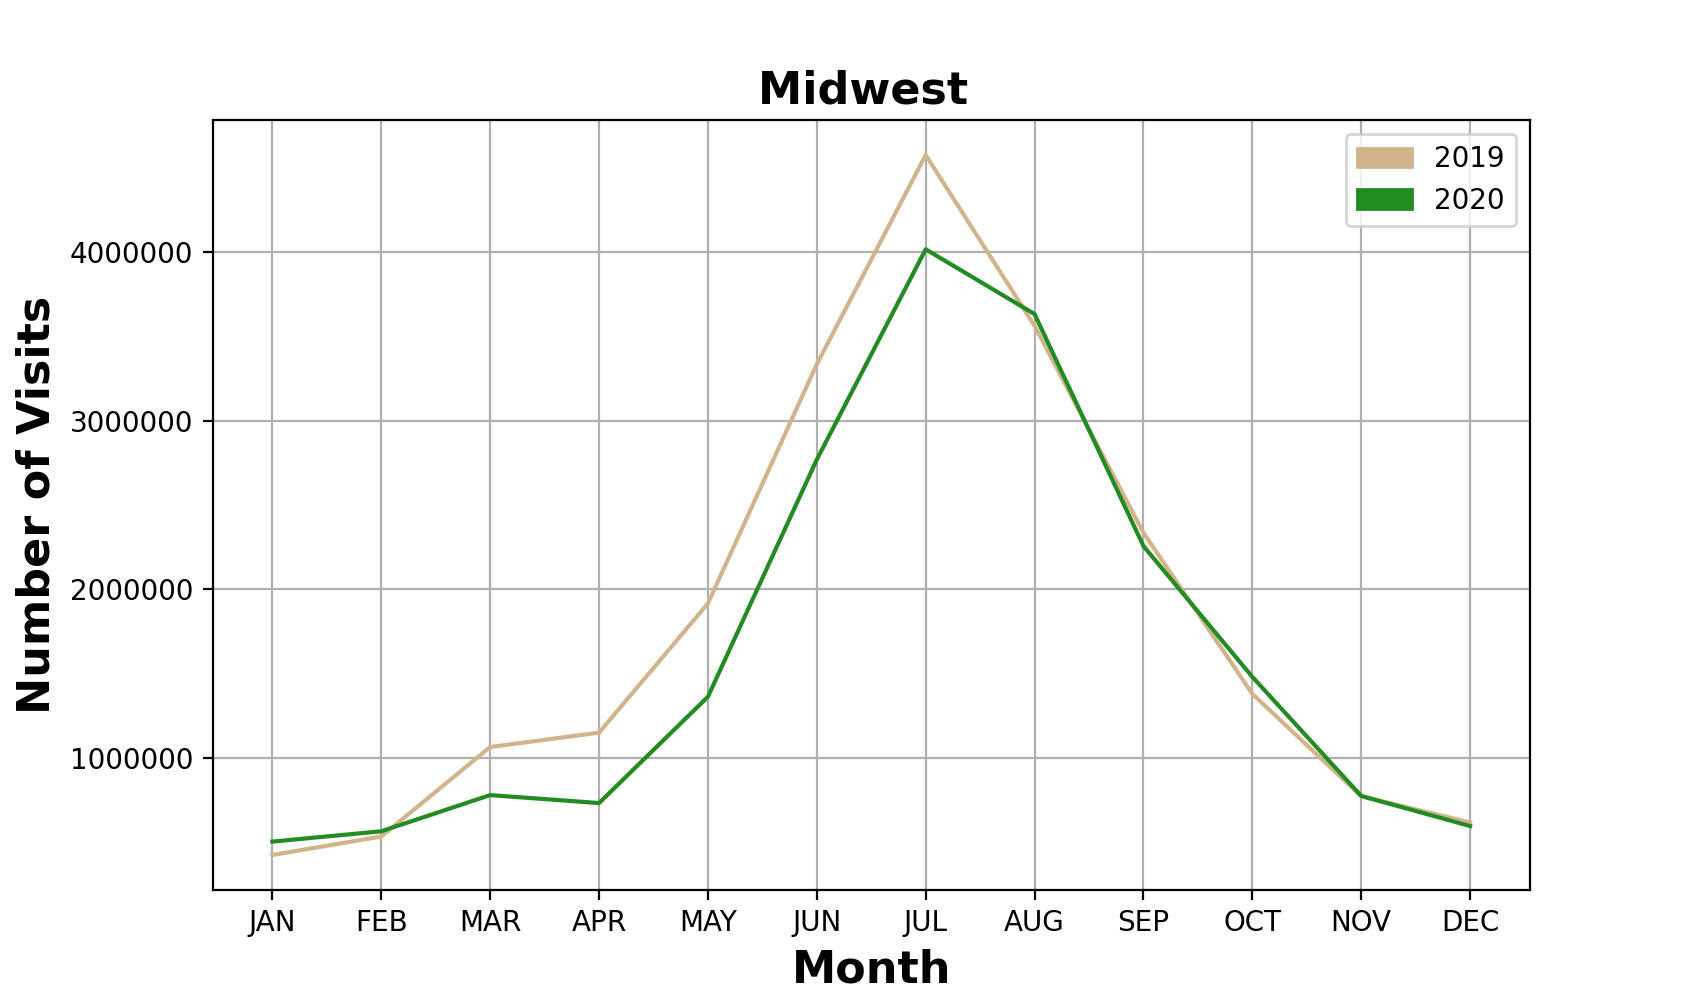

<IPython.core.display.Javascript object>


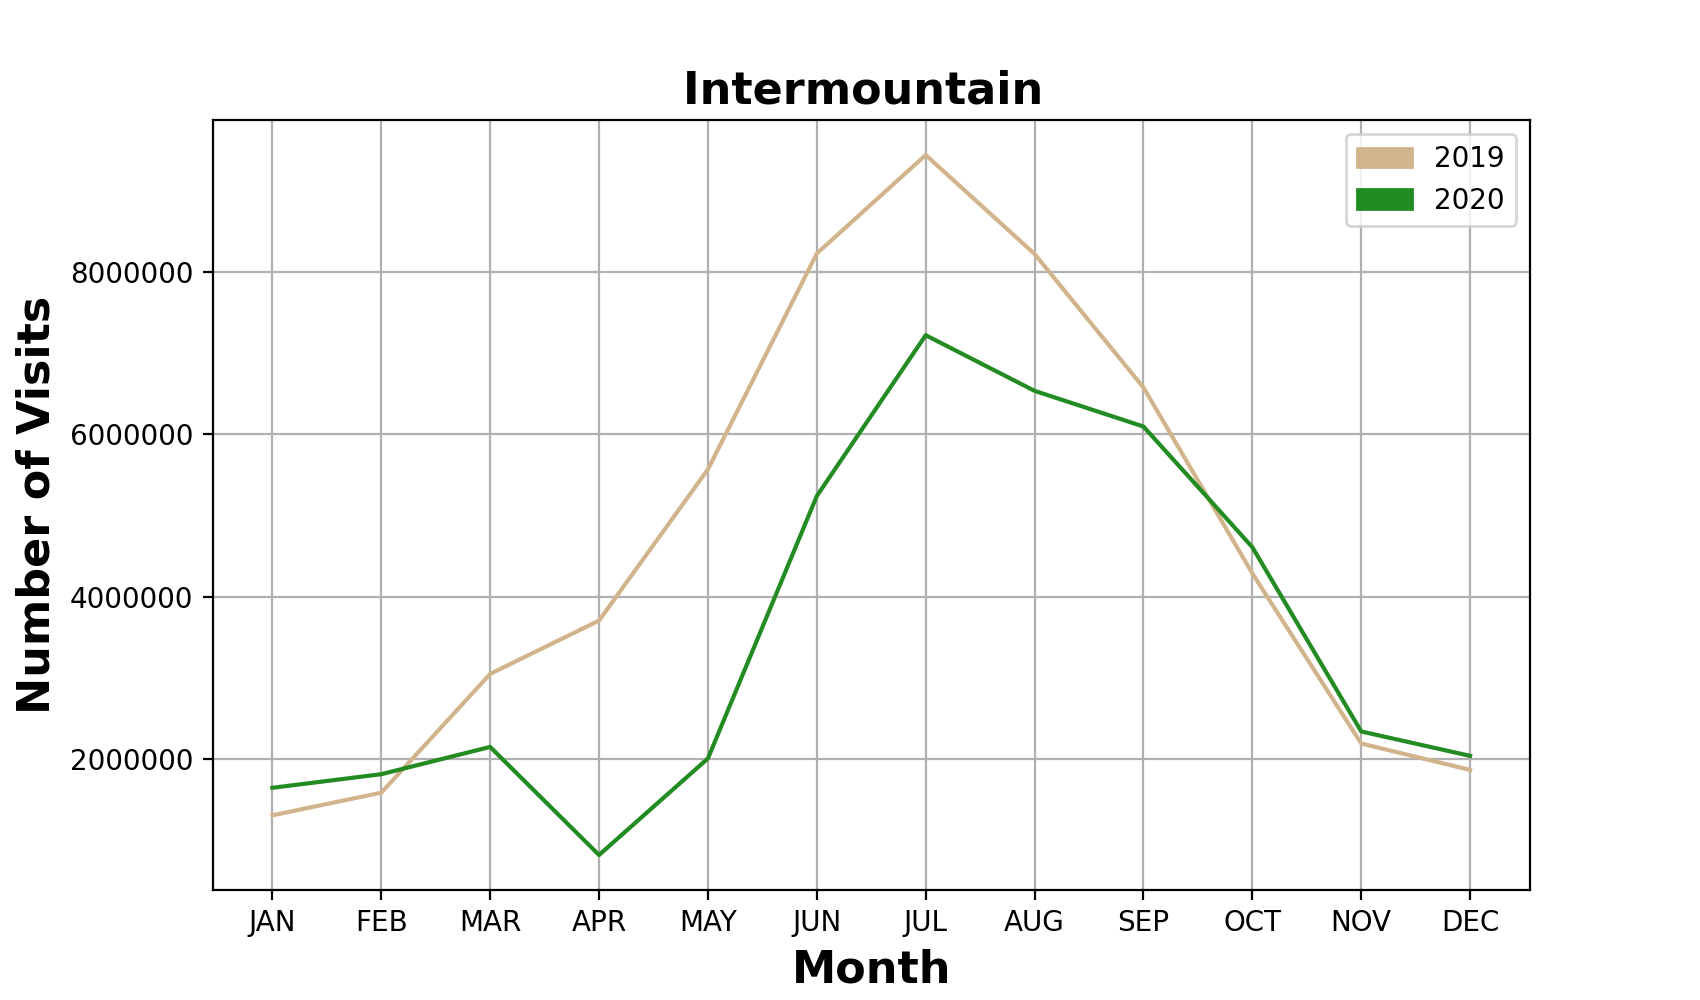

<IPython.core.display.Javascript object>


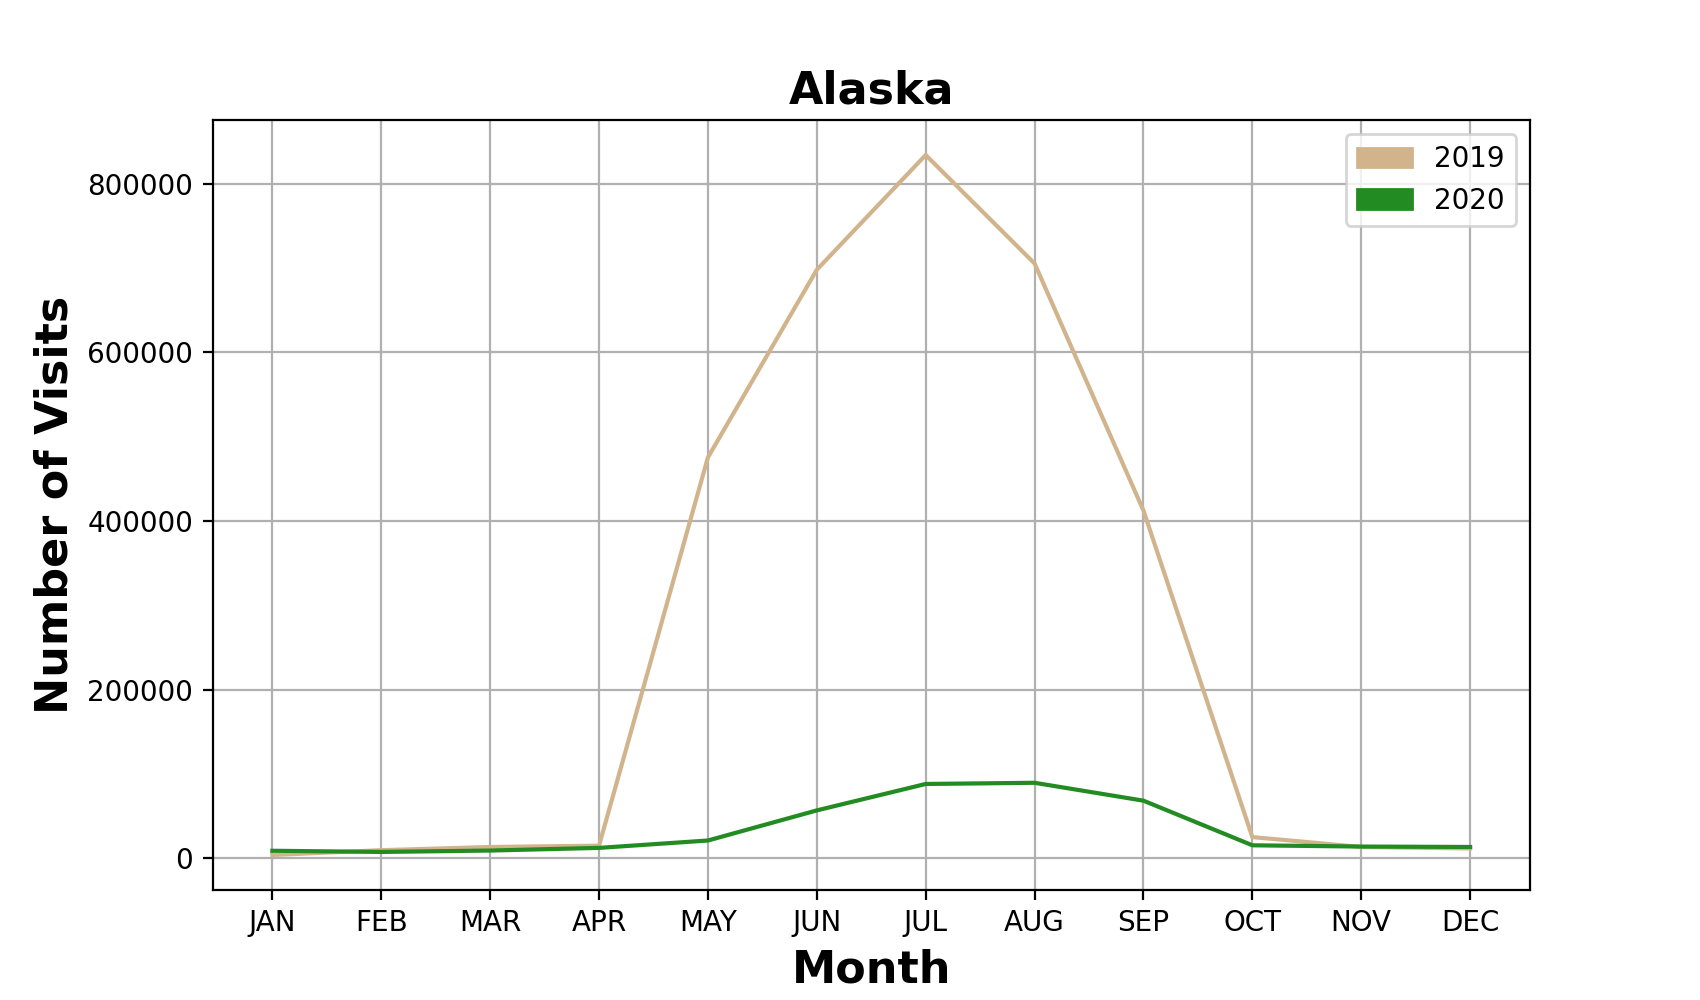

<IPython.core.display.Javascript object>


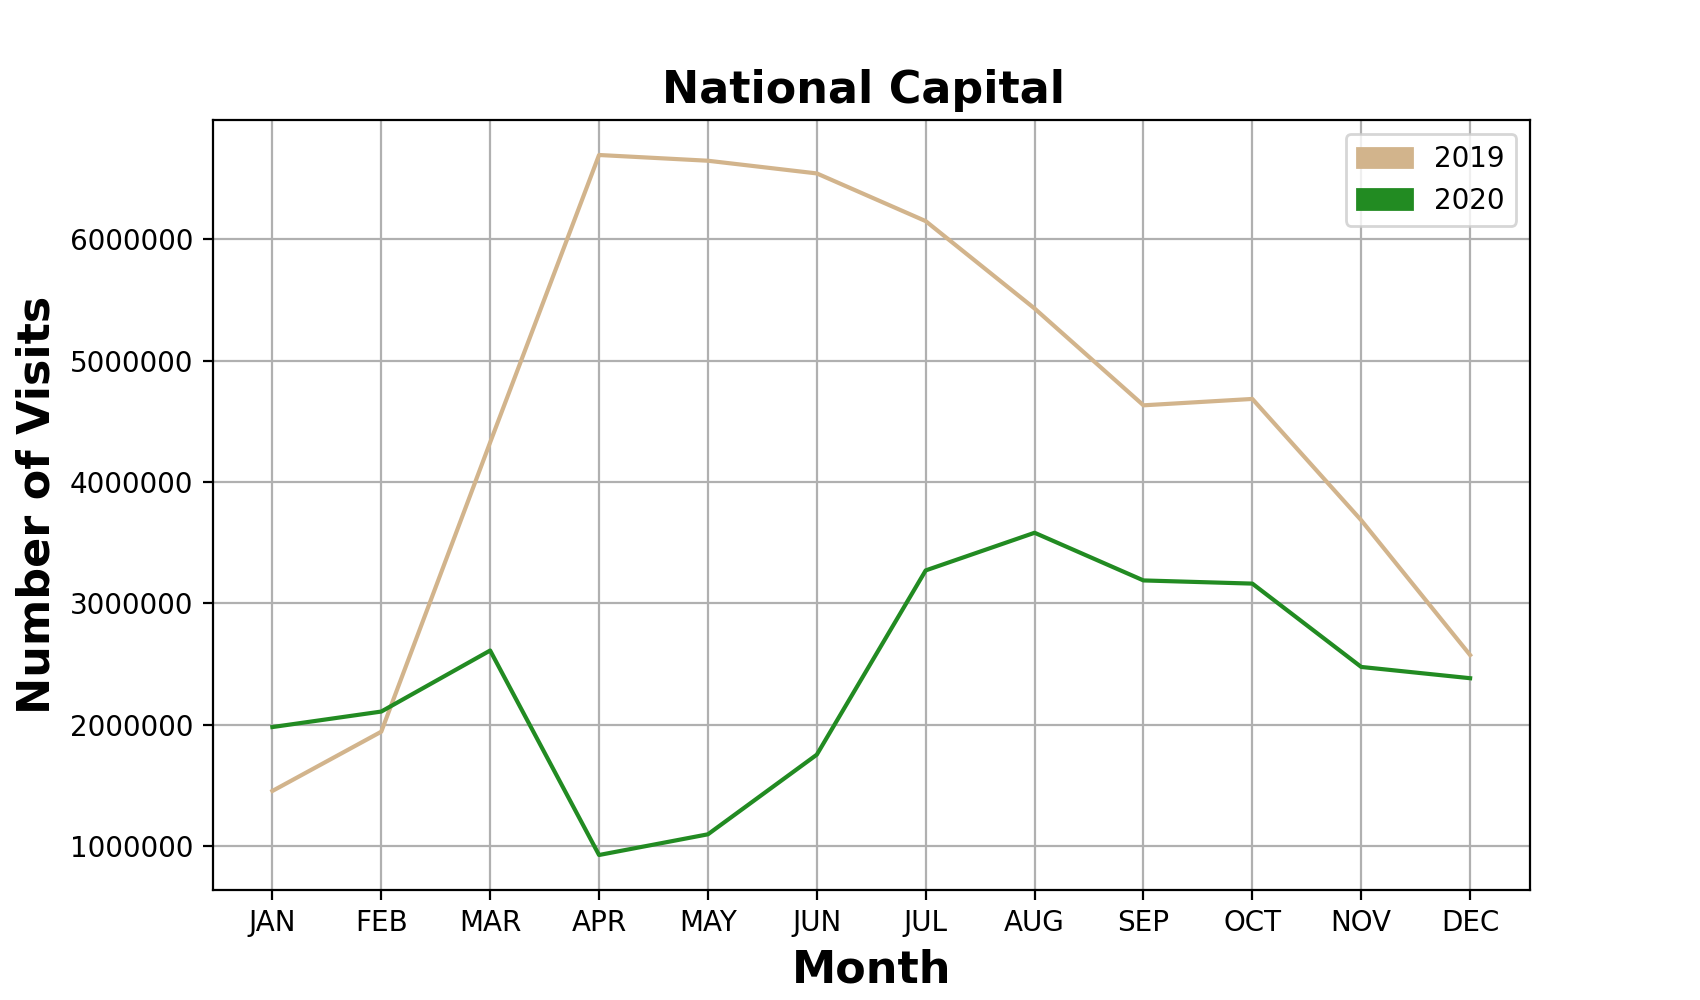

<IPython.core.display.Javascript object>


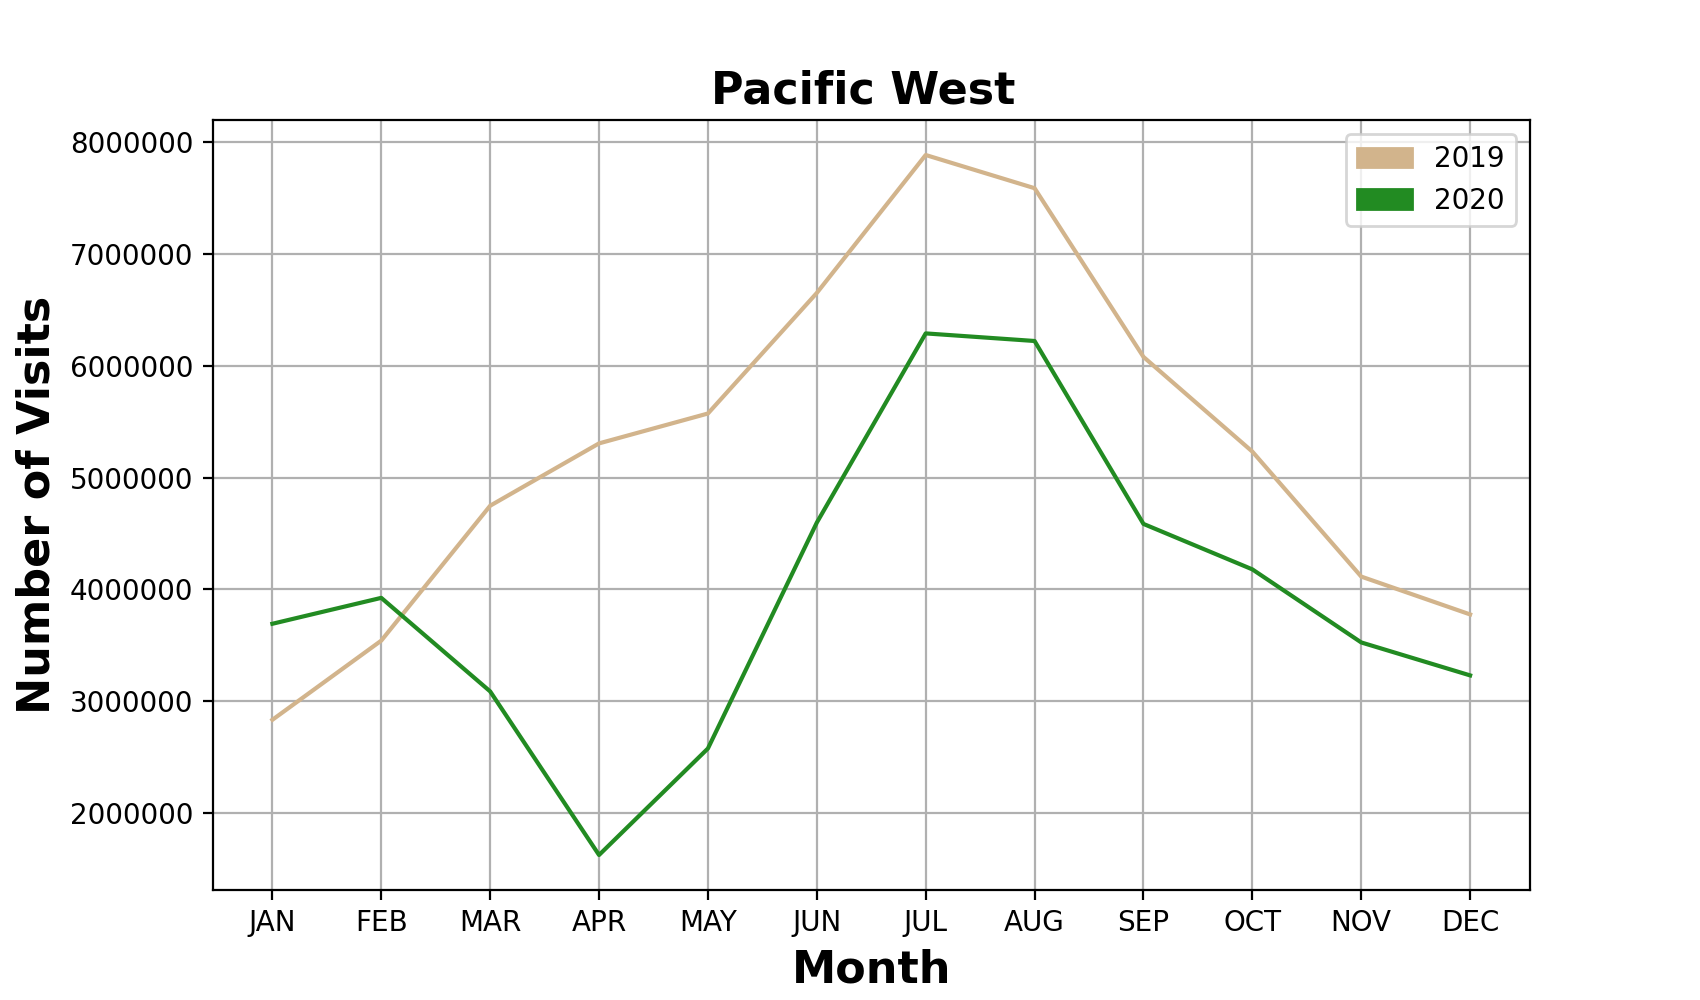

In [13]:
# ANALYSIS 3: Impact of COVID-19 on Monthly Visits by Region

x_labels = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
years = {'2019': 'tan', '2020': 'forestgreen'}

regions = month_df['Region'].unique().tolist()

region_data = {}
for c_year in years:
    for x_label in x_labels:
        month_year = x_label+'_'+c_year
        region_data[month_year] = month_df.groupby('Region')[month_year].sum()

for region in regions:
    handles = []
    for c_year in years:
        y_data = []
        for x_label in x_labels:
            month_year = x_label+'_'+c_year
            y_data.append(region_data[month_year][region])
        color = years[c_year]
        plt.plot(y_data, color=color)
        handles.append(mpatches.Patch(color=color, label=c_year))

    plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
    plt.title(region, fontsize=16, color='black',fontweight='bold')
    plt.xlabel('Month',fontsize=16, color='black',fontweight='bold')
    plt.ylabel('Number of Visits',fontsize=16, color='black',fontweight='bold')
    plt.xticks(np.arange(len(x_labels)), x_labels)
    plt.legend(handles=handles)
    plt.rcParams['figure.figsize'] = [8.5,5]
    plt.grid()
    plt.show()

In [14]:
# Read in a new data file that provides historical park visits for the past 10 years

file_path="Data_Resources/Annual Visitation By Park (1979 - Last Calendar Year).xlsx"

annual_visitation_df = pd.read_excel(file_path)
#annual_visitation_df.dtypes

file_path="Data_Resources/park_type_and_region.csv"

park_info_df = pd.read_csv(file_path)
#park_info_df.dtypes

# MERGE data files together
df = pd.merge(annual_visitation_df, park_info_df, on="parkCode", how='outer')
#df

In [15]:
# Convert select data years an convert into floats

annual_visitation_df['park_2011'] = annual_visitation_df['park_2011'].astype(float)
annual_visitation_df['park_2012'] = annual_visitation_df['park_2012'].astype(float)
annual_visitation_df['park_2013'] = annual_visitation_df['park_2013'].astype(float)
annual_visitation_df['park_2014'] = annual_visitation_df['park_2014'].astype(float)
annual_visitation_df['park_2015'] = annual_visitation_df['park_2015'].astype(float)
annual_visitation_df['park_2016'] = annual_visitation_df['park_2016'].astype(float)
annual_visitation_df['park_2017'] = annual_visitation_df['park_2017'].astype(float)
annual_visitation_df['park_2018'] = annual_visitation_df['park_2018'].astype(float)
annual_visitation_df['park_2019'] = annual_visitation_df['park_2019'].astype(float)
annual_visitation_df.dtypes

parkCode      object
Park Name     object
park_2010    float64
park_2011    float64
park_2012    float64
park_2013    float64
park_2014    float64
park_2015    float64
park_2016    float64
park_2017    float64
park_2018    float64
park_2019    float64
Average      float64
dtype: object

In [16]:
# ANALYSIS 4: Extract a sorted list of park types for Average Yearly Visits over a 10-year Period (Pre-COVID)
    
sum10_df = df.groupby('parkType').sum()

sum10_df['10YearAvg'] = 0

for y in range(2010, 2020):
    column = f'park_{y}'
    sum10_df['10YearAvg'] += sum10_df[column]

sum10_df['10YearAvg'] /= 10
sum10_df.sort_values(by='10YearAvg', ascending=False)

,park_2010,park_2011,park_2012,park_2013,park_2014,park_2015,park_2016,park_2017,park_2018,park_2019,Average,10YearAvg
parkType,,,,,,,,,,,,
National Park,"71,079,019",68607024,71065451,69136047,73927020,80305331,87619211,89391395,87714135,91010784,"78,985,542","78,985,542"
National Recreation Area,"49,044,088",47365896,44679478,43997058,45218953,46230396,50331201,52107818,51022484,52110142,"48,210,751","48,210,751"
National Memorial,"29,736,288",30080078,34694611,33739378,35833896,40418147,42183414,40645496,38111959,37653264,"36,639,522","36,309,653"
National Historical Park,"29,776,071",29408774,30392954,30321111,32264620,32287173,34641708,35241069,33161620,34732138,"32,436,762","32,222,724"
National Parkway,"28,576,098",29713173,29389054,27479002,28525215,29557215,32802051,31415912,29846041,30186057,"29,748,982","29,748,982"
National Monument,"20,014,861",19550656,18402571,15452762,21378782,21820871,22303110,22719726,21577687,22406247,"21,251,303","20,562,727"
National Seashore,"18,118,155",18801331,18877720,18664804,18546676,18706214,19797234,18472367,18325744,20273975,"18,858,422","18,858,422"
National Historic Site,"9,014,086",8857717,9355960,8831518,9080406,9199517,10449789,9668115,8664509,8850017,"9,208,213","9,197,163"
Park (Other),"8,132,297",7762848,6651772,7337542,8642253,8496867,8942596,9334814,8691360,8489113,"8,248,146","8,248,146"


In [17]:
# Read in a new data file that provides the overnight stays for 2019

file_path="Data_Resources/2019Fiscal_Year_Visitation_Report.csv"

overnight_stays_df = pd.read_csv(file_path)
#overnight_stays_df


In [18]:
# ANALYSIS 5: Examine the overnight stays for 2019 with a Pie Chart
# Rename the column names for chart readibility

renamed_stays_df = overnight_stays_df.rename(columns={'TotalConcessionerLodging2019': 'Lodging', 'TotalConcessionerCamping2019': 'Camping',
                                   'TotalTentOvernights2019': 'Tent', 'TotalRecreationVehicleOvernights2019': 'RV', 
                                   'TotalBackcountryOvernights2019': 'Backcountry',
                                   'TotalMiscellaneousOvernights2019': 'Misc.',
                                   'TotalNonRecreationOvernights2019': 'Non-Recreation'})

# renamed_stays_df.head()


<IPython.core.display.Javascript object>


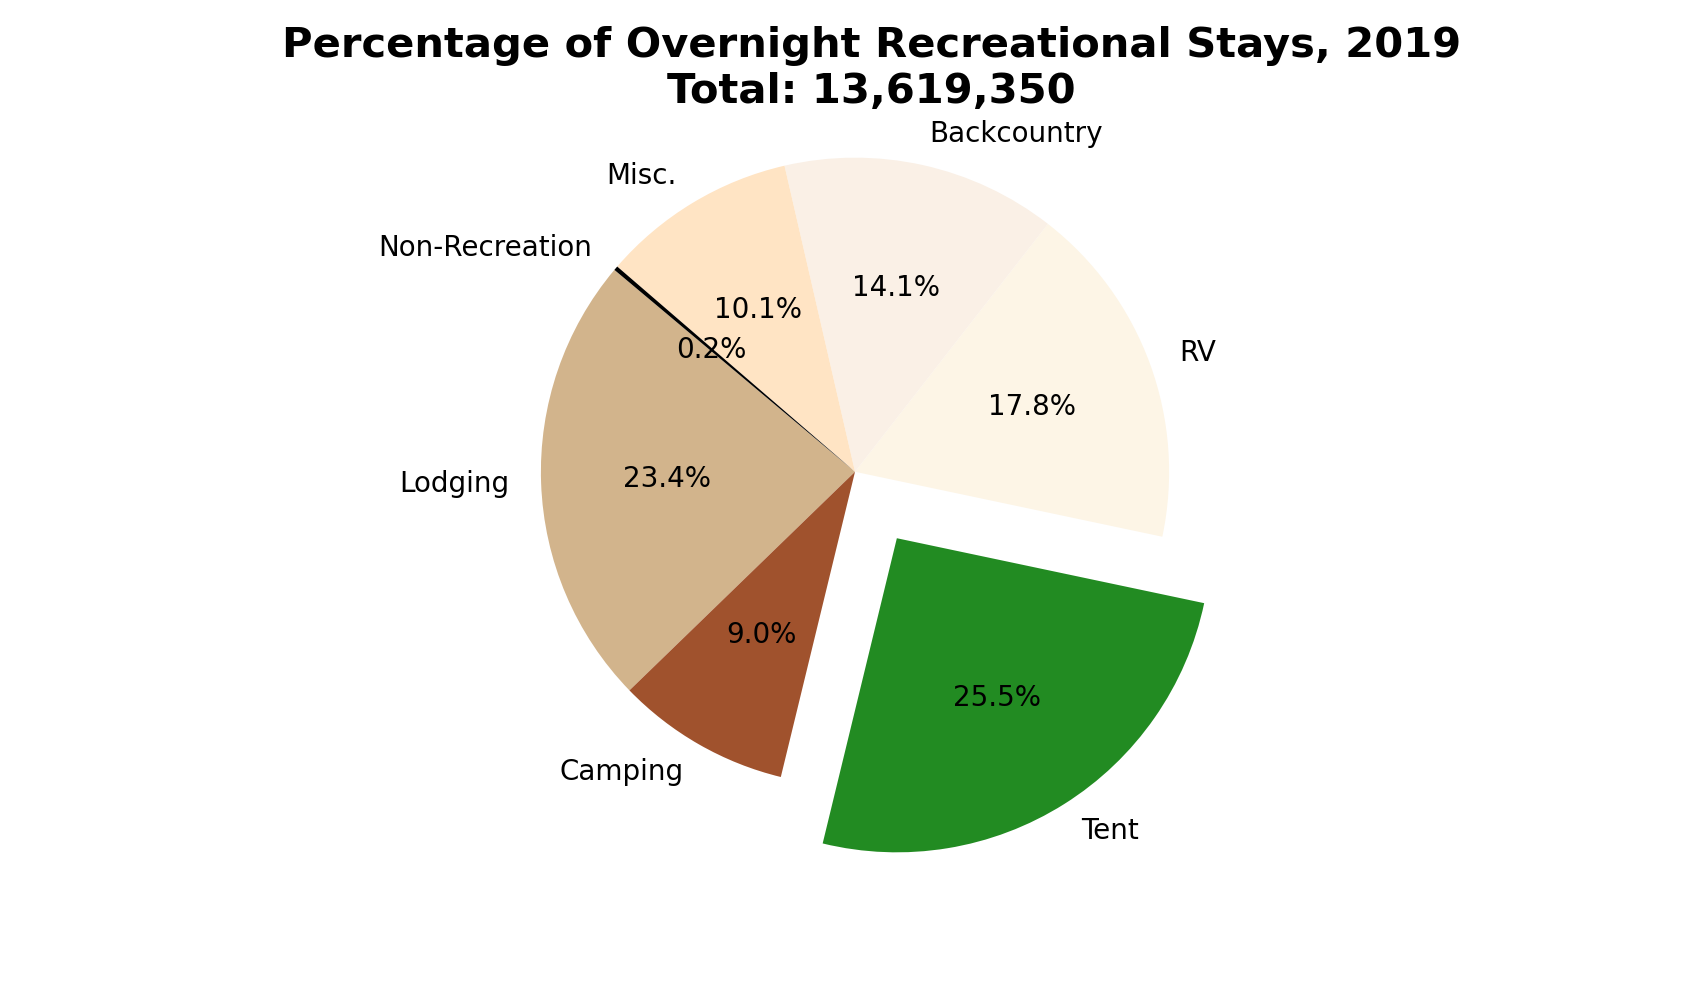

(-0.4456822526416237,
 0.4870443763371684,
 -0.5325895312282032,
 0.44797186186975846)

In [19]:
# Create a pie chart on the overnight stays

%matplotlib notebook

# Import our dependencies
import matplotlib.pyplot as plt
import numpy as np

# Extract the last seven columns to be charted
labels = renamed_stays_df.columns.values.tolist()[-7:]
sizes = renamed_stays_df.loc[0].values.tolist()[-7:]
sizes = [int(i.replace(',','')) for i in sizes]

# The colors of each section of the pie chart
colors = ["tan", "sienna", "forestgreen", "oldlace","linen", "bisque", "black"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0, 0.10, 0, 0, 0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", radius=1*.4, shadow=False, startangle=140)
plt.title("Percentage of Overnight Recreational Stays, 2019\nTotal: 13,619,350",fontsize=15,color="black",fontweight="bold")

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

In [20]:
# ANALYSIS 6A: Identify the Top 10 Visits by Park (2010-2019 averaged * Pre-COVID19)
annual_visitation_df.sort_values(by=['Average'], ascending=False).head(10)


# Top 10
# 1. Golden Gate NRA (14,840,800)
# 2. Blue Ridge PKWY (14,791,419)
# 3. Great Smoky Mountains NP (10,494,546)
# 4. Gateway NRA (7,665,918)
# 5. George Washington MEM PKWY (7,654,910)
# 6. Lincoln Memorial (7,131,717)
# 7. Lake Mead NRA (7,048,517)
# 8. Natchez Trace PKWY (5,975,784)
# 9. Grand Canyon NP (5,252,922)
# 10. Vietnam Veterans MEM (4,681,521)

,parkCode,Park Name,park_2010,park_2011,park_2012,park_2013,park_2014,park_2015,park_2016,park_2017,park_2018,park_2019,Average
149,GOGA,Golden Gate NRA,"14,271,503","14,567,487","14,540,338","14,289,121","15,004,420","14,888,537","15,638,777","14,981,897","15,223,697","15,002,227","14,840,800"
32,BLRI,Blue Ridge PKWY,"14,517,118","15,382,447","15,205,059","12,877,368","13,941,749","15,054,603","15,175,578","16,093,765","14,690,418","14,976,085","14,791,419"
158,GRSM,Great Smoky Mountains NP,"9,463,538","9,008,830","9,685,829","9,354,695","10,099,276","10,712,674","11,312,786","11,338,893","11,421,200","12,547,743","10,494,546"
137,GATE,Gateway NRA,"8,820,757","7,697,727","5,043,863","6,191,246","6,021,713","6,392,565","8,651,770","9,190,610","9,243,305","9,405,622","7,665,918"
143,GWMP,George Washington MEM PKWY,"6,925,099","7,417,397","7,425,577","7,360,392","7,472,150","7,286,463","10,323,339","7,562,793","7,288,623","7,487,265","7,654,910"
216,LINC,Lincoln Memorial,"6,042,315","5,971,220","6,191,361","6,546,518","7,139,072","7,941,771","7,915,934","7,956,117","7,804,683","7,808,182","7,131,717"
207,LAKE,Lake Mead NRA,"7,080,758","6,396,682","6,285,439","6,344,714","6,942,873","7,298,465","7,175,891","7,882,339","7,578,958","7,499,049","7,048,517"
248,NATR,Natchez Trace PKWY,"5,910,950","5,765,343","5,560,668","6,012,740","5,846,474","5,785,812","5,891,315","6,326,062","6,362,439","6,296,041","5,975,784"
152,GRCA,Grand Canyon NP,"4,388,386","4,298,178","4,421,352","4,564,840","4,756,771","5,520,736","5,969,811","6,254,238","6,380,495","5,974,411","5,252,922"
353,VIVE,Vietnam Veterans MEM,"4,555,371","4,020,127","4,424,407","4,142,721","4,403,467","5,597,077","5,299,713","5,072,589","4,719,148","4,580,587","4,681,521"


In [21]:
# ANALYSIS 6B: Identify the Bottom 10 Visits by Park (2010-2020 averaged * Pre-COVID19)
annual_visitation_df.sort_values(by=['Average'], ascending=True).head(10)

# Bottom 10
# 1. Aniakchak NM & PRES (96)
# 2. Rio Grande W&SR (533)
# 3. Port Chicago Naval Magazine NMEM (892)
# 4. Thaddeus Kosciuszko NMEM (2,039)
# 5. Carter G. Woodson Home NHS (2,073)*
# 6. Yukon-Charley Rivers NPRES (2,118)
# 7. Bering Land Bridge NPRES (2,566)
# 8. Nicodemus NHS (3,230)
# 9. Eugene O'Neill NHS (3,249)
# 10. Sand Creek Massacre NHS (5,555)
# # *only three years of data - new park

,parkCode,Park Name,park_2010,park_2011,park_2012,park_2013,park_2014,park_2015,park_2016,park_2017,park_2018,park_2019,Average
10,ANIA,Aniakchak NM & PRES,62,57,19,134,134,153,100,100,100,100,96
295,RIGR,Rio Grande W&SR,"1,103",873,694,703,321,120,463,399,330,324,533
286,POCH,Port Chicago Naval Magazine NMEM,984,545,533,596,786,963,"1,942","1,086",653,830,892
333,THKO,Thaddeus Kosciuszko NMEM,"2,888","1,949","2,045","1,682","1,475","1,261","2,794","2,293","2,077","1,921","2,038"
54,CAWO,Carter G. Woodson Home NHS,0,0,0,0,0,0,0,"1,884","1,954","2,381","2,073"
377,YUCH,Yukon-Charley Rivers NPRES,"6,211","1,718","1,393","3,914","2,329","1,133","1,146",952,"1,272","1,114","2,118"
23,BELA,Bering Land Bridge NPRES,"2,642","1,890","2,642","2,642","2,636","2,642","2,642","2,642","2,642","2,642","2,566"
258,NICO,Nicodemus NHS,"3,448","2,681","3,505","3,241","3,374","3,306","3,552","2,916","2,738","3,540","3,230"
100,EUON,Eugene O'Neill NHS,"2,445","2,593","2,789","2,929","3,202","3,942","4,287","3,931","3,432","2,944","3,249"
316,SAND,Sand Creek Massacre NHS,"4,063","3,935","4,384","4,795","7,402","5,887","6,847","6,535","6,006","5,701","5,556"


In [22]:
# ANALYSIS 7: FIND THE AVERAGE, MIN, AND MAX COST TO ENTER A PARK?

# Read in api file with cost data
api_file_path ="Data_Resources/nps_api_data"
nps_api_df = pd.read_csv(api_file_path)

#Read in characteristics of the state
state_file_path="Data_Resources/StateNameList.csv"
state_df = pd.read_csv(state_file_path)


In [23]:
# Merge the dataframes

park_df = pd.merge(nps_api_df, parkcode_df, on="parkCode", how='left')
#park_df

data_df = pd.merge(park_df,state_df, on='state', how='left')
#data_df

In [24]:
# Create cost dataframe, clean it, and find the summary statistics table through .describe()

cost_df = data_df.copy()

cost_df["parkType"].fillna("Unknown", inplace = True)
cost_df["Region"].fillna("Unknown", inplace = True)

cost_df["parkType"].replace({'Park (Other)':'Park Other/Unknown',
                                   'Unknown': 'Park Other/Unknown'}, inplace=True)
# park_region_df["parkType"].value_counts()
# park_region_df

cost_df['cost']=cost_df['cost'].astype(float)
cost_df['cost'].describe()

count                    468
mean                       5
std                       10
min                        0
25%                        0
50%                        0
75%                        6
max                       40
Name: cost, dtype: float64